### MEDC0106: Bioinformatics in Applied Biomedical Science

<p align="center">
  <img src="https://github.com/MEDC0106/PythonWorkshop/blob/main/resources/static/Banner.png?raw=1" alt="MEDC0106 Banner" width="90%"/>
  <br>
</p>

---------------------------------------------------------------

# 09 - Pandas

*Written by:* Oliver Scott

**This notebook provides a general introduction to Pandas.**

Feel free to modify the code cells to see how things work!

### What is Pandas?

**[Pandas](https://pandas.pydata.org/)** is a powerful Python package for data analysis, offering functions for analysing, cleaning, and manipulating data. It is one of the most crucial tools for data scientists and forms the backbone of many Python-based data science projects.

Data manipulation with Pandas is often the first step before further analysis using other Python packages, such as:
- **[SciPy](https://www.scipy.org/)** for statistical analysis,
- **[Matplotlib](https://matplotlib.org/)** for data visualization,
- **[scikit-learn](https://scikit-learn.org/stable/)** for machine learning.

These tools are part of the Python scientific stack, essential for informatics or data science careers. To be effective in Pandas, it is helpful to have a solid understanding of core Python concepts (as covered in the first session) and some familiarity with NumPy (covered in the supplementary notebook for Session 3). If any concepts are challenging, reviewing previous notebooks might be helpful.

This notebook covers the basics of Pandas. While Pandas is a comprehensive library that could fill an entire course, here we’ll focus on fundamental concepts to get you started and provide a foundation for further learning.

-----

## Contents

1. [The basics](#The-basics)
2. [Creating DataFrames](#Creating-DataFrames)
3. [Reading data](#Reading-data)
4. [Essential operations](#Essential-operations)
5. [Slicing and selecting](#Slicing-and-selecting)
5. [Arithmetic operations](#Arithmetic-operations)
6. [Applying functions](#Applying-functions)
7. [Time-series](#Time-series)
8. [Plotting](#Plotting)

-----

### Extra resources:

- [Pandas Getting Started Guide](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html) - Introduction to Pandas
- [RealPython-01](https://realpython.com/pandas-python-explore-dataset/) - Introduction to Pandas
- [RealPython-02](https://realpython.com/pandas-dataframe/) - Pandas DataFrames

-----

### References:

- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Learn Data Science](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/)

-----

## The basics

Importing `pandas` is no different to any other package/module. Pandas users often use the `pd` alias to keep code clean:

In [30]:
import pandas as pd

# Create a Pandas Series
s = pd.Series([1.0, 2.0, 3.0, 5.0])

# Display the Series
s

,0
0,1.0
1,2.0
2,3.0
3,5.0


### Core Components

Pandas has two core components, the `Series` and the `DataFrame`.

The `Series` can be imagined as a single column in a data table, whereas the `DataFrame` can be imagined as a full data table made up of multiple `Series`. Both types have a similar interface allowing the user to perform similar operations. DataFrames are similar to spreadsheets that you may have interacted with in software such as Excel. DataFrames are often faster, easier to use and more powerful than spreadsheets.

<p align="center">
  <img src="https://www.datasciencemadesimple.com/wp-content/uploads/2020/05/create-series-in-python-pandas-0.png?ezimgfmt=rs%3Adevice%2Frscb1-1" alt="Pandas DataFrame" width="70%"/>
  <br>
</p>

[Image source](https://www.datasciencemadesimple.com/wp-content/uploads/2020/05/create-series-in-python-pandas-0.png?ezimgfmt=rs%3Adevice%2Frscb1-1)

-----

## Creating DataFrames

There are numerous ways to create a DataFrame in Pandas. In most cases it is likely that you will want to read in data from a particular file, however DataFrames can also be constructed from scratch from lists, tuples, NumPy arrays or Pandas Series. One of the simplest ways to create a DataFrame is from a Python dictionary, where keys become column names and values become the column data.

Suppose we wanted to construct a table like the one below:

| PatientID | Gender | Age | Outcome  |
|-----------|--------|-----|----------|
| 556785    | M      | 19  | Negative |
| 998764    | F      | 38  | Positive |
| 477822    | M      | 54  | Positive |
| 678329    | M      | 22  | Negative |
| 675859    | F      | 41  | Negative |

For this we can use the default constructor `pd.DataFrame()`.

In [31]:
# This is our dictionary containing the raw data
data = {
    'PatientID': [556785, 998764, 477822, 678329, 675859],
    'Gender': ['M', 'F', 'M', 'M', 'F'],
    'Age': [19, 38, 54, 22, 41],
    'Outcome': ['Negative', 'Positive', 'Positive', 'Negative', 'Negative']
}

# We can now construct a DataFrame
df = pd.DataFrame(data)
df  # Show the data

,PatientID,Gender,Age,Outcome
0,556785,M,19,Negative
1,998764,F,38,Positive
2,477822,M,54,Positive
3,678329,M,22,Negative
4,675859,F,41,Negative


Notice how there is also an unnamed column containing the numbers 0-4. This is the **index** of each row. In fact, you may also specify a custom index when constructing a dataframe; (`pd.DataFrame(data, index=['Tom', 'Joanne', 'Joe', 'Xander', 'Selena'])`). In this case the index is the name of the patient.

When working with large tables of data, viewing the entire table is often impractical. Pandas provides the `.head()` method to display the first few rows and `.tail()` to display the last few rows. These methods are useful for quickly inspecting the top or bottom of a DataFrame without loading the full dataset.

In [32]:
# Display the first three rows
df.head(n=3)

,PatientID,Gender,Age,Outcome
0,556785,M,19,Negative
1,998764,F,38,Positive
2,477822,M,54,Positive


In [33]:
# Display the last two rows
df.tail(n=2)

,PatientID,Gender,Age,Outcome
3,678329,M,22,Negative
4,675859,F,41,Negative


Accessing an individual column in a DataFrame is straightforward and uses the same syntax as accessing a key in a Python dictionary.

In [34]:
gender_column = df['Gender']
gender_column

,Gender
0,M
1,F
2,M
3,M
4,F


If the column label is a string, you can also use **dot-syntax** to access the column.

In [35]:
age_column = df.Age
age_column

,Age
0,19
1,38
2,54
3,22
4,41


## Reading data

Reading and writing data in various file formats is an essential part of the data analysis pipeline. Pandas can handle data from multiple file types, including CSV, JSON, Excel, SQL, and [many more](https://pandas.pydata.org/pandas-docs/stable/reference/io.html).

In the folder `data` we have provided a dataset downloaded from the [UK government](https://coronavirus.data.gov.uk/details/cases?areaType=overview&areaName=United%20Kingdom) detailing the number of reported positive COVID-19 test results in the United Kingdom by date reported (up to Oct-31-21). The file is in the CSV format and can be read using Pandas with the method `.read_csv()`.

In [36]:
cv_data_path = 'https://raw.githubusercontent.com/MEDC0106/PythonWorkshop/main/workshop/session_3/data/data_2021-Oct-31.csv'  # This is the path to our data

cv_data = pd.read_csv(cv_data_path)
cv_data.head(n=10)

,areaType,areaName,areaCode,date,newCasesByPublishDate,cumCasesByPublishDate
0,nation,England,E92000001,2021-10-31,31479,7700753
1,nation,England,E92000001,2021-10-30,36204,7669614
2,nation,England,E92000001,2021-10-29,36853,7633950
3,nation,England,E92000001,2021-10-28,33903,7597473
4,nation,England,E92000001,2021-10-27,37502,7564400
5,nation,England,E92000001,2021-10-26,32280,7526898
6,nation,England,E92000001,2021-10-25,33309,7494992
7,nation,England,E92000001,2021-10-24,33221,7462144
8,nation,England,E92000001,2021-10-23,41259,7430143
9,nation,England,E92000001,2021-10-22,41745,7388884


You can also easily save a DataFrame to a new CSV file using the `df.to_csv()` method.

```python
cv_data.to_csv('coronavirus_testing_results.csv')
```

Give it a try!

In [37]:
df.to_csv(cv_data.to_csv('coronavirus_testing_results.csv'))

',PatientID,Gender,Age,Outcome\n0,556785,M,19,Negative\n1,998764,F,38,Positive\n2,477822,M,54,Positive\n3,678329,M,22,Negative\n4,675859,F,41,Negative\n'

## Essential operations

Now that we’ve loaded data into a DataFrame, we can start analyzing it. Typically, after loading data, it’s helpful to view it briefly to ensure it looks correct and to understand the values you’re working with. We’ve already discussed visualising data with `.head()` and `.tail()`. Another useful method is `.info()`, which provides essential details about your dataset, such as the number of rows and columns, non-null counts, data types for each column, and memory usage.

In [38]:
cv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   areaType               2466 non-null   object
 1   areaName               2466 non-null   object
 2   areaCode               2466 non-null   object
 3   date                   2466 non-null   object
 4   newCasesByPublishDate  2466 non-null   int64 
 5   cumCasesByPublishDate  2466 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 115.7+ KB


Notice that we have 6 columns, with four of type `object` (often representing strings) and two of type `int64` (integers). The `.info()` output also shows that we have 2466 non-null values, meaning no missing values in this dataset. Knowing the data type of each column is important because it determines which operations we can perform on them (e.g., we would not calculate the mean of a column containing strings).

You can also use `.shape` to see the number of rows and columns.

In [39]:
cv_data.shape

(2466, 6)

#### Removing duplicates

Input data is often noisy and requires cleaning before analysis. One common issue is duplicated rows, which can skew statistical analysis. Fortunately, Pandas provides tools to handle this easily. Since our current data does not contain duplicates, we will create some by duplicating the existing data and appending it to itself.

In [40]:
duplicated = pd.concat([cv_data, cv_data])  # Here we have copied the data and added it to itself
duplicated.shape

(4932, 6)

Notice that we assign the result of the `.concat()` method to a new variable, which creates a copy of the data without altering the original DataFrame. We can now easily remove duplicates using the `.drop_duplicates()` method. Reviewing the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html) is helpful to explore additional arguments and options provided by this function.

In [41]:
duplicated = duplicated.drop_duplicates()
duplicated.shape

(2466, 6)

Notice that the shape of the data is now the same as the original, confirming that duplicates have been removed.

Also, observe that, again, we assigned the result to a new variable with the same name. This pattern can become cumbersome, so Pandas offers an `inplace` argument. By setting `inplace=True`, Pandas performs the operation directly on the original DataFrame, eliminating the need to assign it to a new variable.

```python
duplicated.drop_duplicates(inplace=True)  # no need to assign to a new variable
```

#### Removing null values

Raw data often contains missing values that need to be addressed before analysis. Missing values are typically represented by `None` or `np.nan`. There are two main options for handling missing data:

1. Remove all rows with missing values.
2. Impute (fill in) the missing values.

Here, we will focus on the first approach.

Since our data is already clean and contains no null values, we’ll add a new column with some null values for demonstration purposes.

In [42]:
import random

n_rows = len(cv_data)  # Get the number of rows in the `cv_data` DataFrame

# Create a list with 20% None values and 80% ones
nulls_or_ones = []
for _ in range(n_rows):
    if random.random() < 0.2:  # 20% chance of None
        nulls_or_ones.append(None)
    else:
        nulls_or_ones.append(1)

print("Prepared a random list of length:", len(nulls_or_ones))
print("Is the first value null?", pd.isna(nulls_or_ones[0]))  # Check if the first value is None

Prepared a random list of length: 2466
Is the first value null? False


Now add a column to the `cv_data` DataFrame containing our newly constructed list.

In [43]:
cv_data['RandomData'] = nulls_or_ones  # Make a colum called 'RandomData'
cv_data.head(10)

,areaType,areaName,areaCode,date,newCasesByPublishDate,cumCasesByPublishDate,RandomData
0,nation,England,E92000001,2021-10-31,31479,7700753,1.0
1,nation,England,E92000001,2021-10-30,36204,7669614,1.0
2,nation,England,E92000001,2021-10-29,36853,7633950,1.0
3,nation,England,E92000001,2021-10-28,33903,7597473,1.0
4,nation,England,E92000001,2021-10-27,37502,7564400,1.0
5,nation,England,E92000001,2021-10-26,32280,7526898,1.0
6,nation,England,E92000001,2021-10-25,33309,7494992,1.0
7,nation,England,E92000001,2021-10-24,33221,7462144,1.0
8,nation,England,E92000001,2021-10-23,41259,7430143,1.0
9,nation,England,E92000001,2021-10-22,41745,7388884,1.0


We can also see now that we have null values.

In [44]:
cv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   areaType               2466 non-null   object 
 1   areaName               2466 non-null   object 
 2   areaCode               2466 non-null   object 
 3   date                   2466 non-null   object 
 4   newCasesByPublishDate  2466 non-null   int64  
 5   cumCasesByPublishDate  2466 non-null   int64  
 6   RandomData             1976 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 135.0+ KB


The `.isnull()` or `.isna()` methods return a DataFrame of the same shape as the original, with `True` for `NaN` or `None` values and `False` for non-null values. They allow you to identify which entries are missing.

Applying `.sum()` after `.isnull()` or `.isna()` counts `True` values, i.e. nulls, in each column, giving a count of missing values per column. This works because `True` is treated as 1 in summation.

In [45]:
cv_data.isna().sum()

,0
areaType,0
areaName,0
areaCode,0
date,0
newCasesByPublishDate,0
cumCasesByPublishDate,0
RandomData,490


In data analysis, you often need to decide whether to remove or impute missing values. Removing data is generally advisable only if the number of missing values is small. To remove rows with null values, you can use the `.dropna()` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html). This method removes any row containing at least one null value and returns a new DataFrame unless `inplace=True` is specified.

If you want to drop columns with null values instead, you can change the axis of operation by setting `axis=1`.

In [46]:
# First let's remove rows with null values
remove_rows = cv_data.dropna()
remove_rows.head(10)

,areaType,areaName,areaCode,date,newCasesByPublishDate,cumCasesByPublishDate,RandomData
0,nation,England,E92000001,2021-10-31,31479,7700753,1.0
1,nation,England,E92000001,2021-10-30,36204,7669614,1.0
2,nation,England,E92000001,2021-10-29,36853,7633950,1.0
3,nation,England,E92000001,2021-10-28,33903,7597473,1.0
4,nation,England,E92000001,2021-10-27,37502,7564400,1.0
5,nation,England,E92000001,2021-10-26,32280,7526898,1.0
6,nation,England,E92000001,2021-10-25,33309,7494992,1.0
7,nation,England,E92000001,2021-10-24,33221,7462144,1.0
8,nation,England,E92000001,2021-10-23,41259,7430143,1.0
9,nation,England,E92000001,2021-10-22,41745,7388884,1.0


In [47]:
remove_rows.shape

(1976, 7)

Now let's change the axis and remove the `RandomData` colum we injected into the `cv_data` DataFrame.

In [48]:
cv_data.dropna(axis=1, inplace=True)  # We can do it inplace since we do not care about this column
cv_data.head(10)

,areaType,areaName,areaCode,date,newCasesByPublishDate,cumCasesByPublishDate
0,nation,England,E92000001,2021-10-31,31479,7700753
1,nation,England,E92000001,2021-10-30,36204,7669614
2,nation,England,E92000001,2021-10-29,36853,7633950
3,nation,England,E92000001,2021-10-28,33903,7597473
4,nation,England,E92000001,2021-10-27,37502,7564400
5,nation,England,E92000001,2021-10-26,32280,7526898
6,nation,England,E92000001,2021-10-25,33309,7494992
7,nation,England,E92000001,2021-10-24,33221,7462144
8,nation,England,E92000001,2021-10-23,41259,7430143
9,nation,England,E92000001,2021-10-22,41745,7388884


In [49]:
cv_data.shape

(2466, 6)

#### Understanding data

Now that your data is cleaner, it’s time to perform some basic statistical analysis to understand each column. This initial exploration helps inform the next steps in the analysis and may guide how to visualise the data. Pandas provides an easy way to get a quick summary of the distribution of continuous variables using `.describe()`.

In [50]:
cv_data.describe()

,newCasesByPublishDate,cumCasesByPublishDate
count,2466.000000,2.466000e+03
mean,3673.046229,7.157798e+05
std,8528.705791,1.530690e+06
min,0.000000,1.000000e+00
25%,97.250000,1.855175e+04
50%,593.500000,1.459160e+05
75%,2020.500000,2.820588e+05
max,61757.000000,7.700753e+06


We can also do the same for categorical columns, but we will have to do it seperately.

In [51]:
cv_data.areaName.describe()

,areaName
count,2466
unique,4
top,England
freq,640


This shows us that in this dataset there are four unique area names with `'England'` being the most frequent. We can also check the unique values using the `.unique()` method.

In [52]:
cv_data.areaName.unique()

array(['England', 'Northern Ireland', 'Scotland', 'Wales'], dtype=object)

We can see that the dataset contains data for:

- England,
- Northern Ireland,
- Scotland,
- and Wales.

But how many times are each of these values recorded? We can use the method `.value_counts()` to find out.

In [53]:
cv_data.areaName.value_counts()

,count
areaName,
England,640
Wales,612
Scotland,609
Northern Ireland,605


## Slicing and selecting

In the previous section we saw how to produce summaries of entire data which is useful. However, sometimes we will want to perform analyses on certain subsets of data. We have already seen how to extract a column of data using square brackets or dot-syntax, i.e. `df['col']` or `df.col`, and now we will dive deeper into the Pandas selection language.

When selecting parts of a DataFrame we may be returning either a `DataFrame` or a `Series`. It is important to know which is returned so that you use the correct syntax.

#### Selecting by column(s)

Using the square-bracket syntax will return a Pandas `Series`.

In [54]:
type(cv_data['areaName'])

pandas.core.series.Series

If you wish to access it as a DataFrame you can supply the column name as a list.

In [55]:
type(cv_data[['areaName']])

pandas.core.frame.DataFrame

Adding another column to our selection is as simple as adding another column name to the list. Obviosuly in this case our code will return a `DataFrame`.

In [56]:
selection = cv_data[['areaName', 'areaCode']]
type(selection)

pandas.core.frame.DataFrame

#### Selecting by row(s)

Selecting rows in a DataFrame can be done using two methods:

- `.loc`: Locates rows by label or name.
- `.iloc`: Locates rows by numerical index.

Since our data has a numerical index, it makes sense to use `.iloc` for row selection. If the data had an index with string labels, `.loc` would be the appropriate choice for selecting rows by name. However, `.iloc` would still work, returning the row at the specified numerical position rather than by name.

In [57]:
cv_data.loc[222]  # Return the row with index 222

,222
areaType,nation
areaName,England
areaCode,E92000001
date,2021-03-23
newCasesByPublishDate,4583
cumCasesByPublishDate,3768609


We can also use slices to select a range of data.

In [58]:
cv_data.loc[222:226]

,areaType,areaName,areaCode,date,newCasesByPublishDate,cumCasesByPublishDate
222,nation,England,E92000001,2021-03-23,4583,3768609
223,nation,England,E92000001,2021-03-22,4746,3764026
224,nation,England,E92000001,2021-03-21,4459,3759280
225,nation,England,E92000001,2021-03-20,4732,3754821
226,nation,England,E92000001,2021-03-19,3809,3750089


#### Conditional selections

Selecting data by index is helpful, but it can be limiting if we don’t know what the indexes correspond to. For example, if we only want the data from Wales, we can use conditional selections to filter the DataFrame based on specific criteria.

Pandas DataFrames can be filtered by using a Boolean array, Series, or DataFrame generated from a conditional expression.

In [59]:
ind = cv_data['areaName'] == 'Wales'  # Creates a Boolean Series
ind.tail(5)  # Displays the last 5 values of the Boolean Series

,areaName
2461,True
2462,True
2463,True
2464,True
2465,True


Using this Boolean Series we can index the DataFrame.

In [60]:
wales_data = cv_data[ind]
wales_data.head(5)

,areaType,areaName,areaCode,date,newCasesByPublishDate,cumCasesByPublishDate
1854,nation,Wales,W92000004,2021-10-31,3016,437972
1855,nation,Wales,W92000004,2021-10-30,0,434956
1856,nation,Wales,W92000004,2021-10-29,2561,434956
1857,nation,Wales,W92000004,2021-10-28,2664,432395
1858,nation,Wales,W92000004,2021-10-27,2582,429731


We can simplify this quite nicely into a one line expression.

In [61]:
wales_data = cv_data[cv_data['areaName'] == 'Wales']
wales_data.head(5)

,areaType,areaName,areaCode,date,newCasesByPublishDate,cumCasesByPublishDate
1854,nation,Wales,W92000004,2021-10-31,3016,437972
1855,nation,Wales,W92000004,2021-10-30,0,434956
1856,nation,Wales,W92000004,2021-10-29,2561,434956
1857,nation,Wales,W92000004,2021-10-28,2664,432395
1858,nation,Wales,W92000004,2021-10-27,2582,429731


We can apply this to numerical columns also.

In [62]:
# Select rows where number of reported positives is less than 100
cv_data[cv_data['newCasesByPublishDate'] < 100].head(5)

,areaType,areaName,areaCode,date,newCasesByPublishDate,cumCasesByPublishDate
489,nation,England,E92000001,2020-06-29,99,160391
508,nation,England,E92000001,2020-06-10,63,155714
510,nation,England,E92000001,2020-06-08,92,155000
594,nation,England,E92000001,2020-03-16,97,1196
598,nation,England,E92000001,2020-03-12,99,486


Chaining conditional expressions allows us to create powerful selections. For this we can use the logical operators `|` and `&`.

**Remember to put separate conditions in parentheses!**

In [63]:
# Count dates in England where numer of reported positives is more than 10,000
cv_data[(cv_data['areaName'] == 'England') & (cv_data['newCasesByPublishDate'] > 10000)].shape

(267, 6)

## Arithmetic operations

Basic arithmentic operations can be applied simultaneously on all rows in a column.

In [64]:
cv_data.newCasesByPublishDate / 100  # Divides a column by 100 and returns a Pandas Series

,newCasesByPublishDate
0,314.79
1,362.04
2,368.53
3,339.03
4,375.02
...,...
2461,0.00
2462,0.00
2463,0.00
2464,0.00


You may also perform arithmetic operations between columns.

In [65]:
cv_data.newCasesByPublishDate + cv_data.cumCasesByPublishDate

,0
0,7732232
1,7705818
2,7670803
3,7631376
4,7601902
...,...
2461,1
2462,1
2463,1
2464,1


You can inject a new column (we will call it `Rubbish`) with the result.

In [66]:
cv_data['Rubbish'] = cv_data.newCasesByPublishDate * 0.3 / cv_data.cumCasesByPublishDate
cv_data.head(5)

,areaType,areaName,areaCode,date,newCasesByPublishDate,cumCasesByPublishDate,Rubbish
0,nation,England,E92000001,2021-10-31,31479,7700753,0.001226
1,nation,England,E92000001,2021-10-30,36204,7669614,0.001416
2,nation,England,E92000001,2021-10-29,36853,7633950,0.001448
3,nation,England,E92000001,2021-10-28,33903,7597473,0.001339
4,nation,England,E92000001,2021-10-27,37502,7564400,0.001487


Pandas also provides some other handy functions.

In [67]:
print(cv_data.newCasesByPublishDate.mean())
print(cv_data.newCasesByPublishDate.std())  # Standard deviation

3673.0462287104624
8528.705790751877


## Applying functions

While it is possible to iterate over a Pandas DataFrame or Series, it is slow in Python.

We can use the `.apply()` method to apply a function to each element in a column or across columns. We can also save this result to a new column.

Let's create an arbitrary function that we can apply to the data we have.

In [68]:
def categorise_cases(x):
    if x >= 10000:
        return 'High'
    elif x <= 200:
        return 'Low'
    else:
        return 'Medium'

# No output is expected from this cell

The above function categorises a case count into arbritarty categories: 'High', 'Medium' and 'Low'. Now we can apply this to the `newCasesByPublishDate` column.

In [69]:
cv_data['Category'] = cv_data['newCasesByPublishDate'].apply(categorise_cases)
cv_data

,areaType,areaName,areaCode,date,newCasesByPublishDate,cumCasesByPublishDate,Rubbish,Category
0,nation,England,E92000001,2021-10-31,31479,7700753,0.001226,High
1,nation,England,E92000001,2021-10-30,36204,7669614,0.001416,High
2,nation,England,E92000001,2021-10-29,36853,7633950,0.001448,High
3,nation,England,E92000001,2021-10-28,33903,7597473,0.001339,High
4,nation,England,E92000001,2021-10-27,37502,7564400,0.001487,High
...,...,...,...,...,...,...,...,...
2461,nation,Wales,W92000004,2020-03-03,0,1,0.000000,Low
2462,nation,Wales,W92000004,2020-03-02,0,1,0.000000,Low
2463,nation,Wales,W92000004,2020-03-01,0,1,0.000000,Low
2464,nation,Wales,W92000004,2020-02-29,0,1,0.000000,Low


Users often will use anonymous functions instead of defining an explicit function like above.

In [70]:
cv_data['newCategory'] = cv_data['newCasesByPublishDate'].apply(lambda x: 'Red' if x >= 20000 else 'Amber')
cv_data

,areaType,areaName,areaCode,date,newCasesByPublishDate,cumCasesByPublishDate,Rubbish,Category,newCategory
0,nation,England,E92000001,2021-10-31,31479,7700753,0.001226,High,Red
1,nation,England,E92000001,2021-10-30,36204,7669614,0.001416,High,Red
2,nation,England,E92000001,2021-10-29,36853,7633950,0.001448,High,Red
3,nation,England,E92000001,2021-10-28,33903,7597473,0.001339,High,Red
4,nation,England,E92000001,2021-10-27,37502,7564400,0.001487,High,Red
...,...,...,...,...,...,...,...,...,...
2461,nation,Wales,W92000004,2020-03-03,0,1,0.000000,Low,Amber
2462,nation,Wales,W92000004,2020-03-02,0,1,0.000000,Low,Amber
2463,nation,Wales,W92000004,2020-03-01,0,1,0.000000,Low,Amber
2464,nation,Wales,W92000004,2020-02-29,0,1,0.000000,Low,Amber


## Time-series

One of the columns contains dates as strings (`object` type), which isn’t very useful for time-based analysis. Pandas has a `datetime` type that allows for more advanced selections and operations based on time spans. First, we need to convert our column to a `datetime` format using the `.to_datetime()` method.

In [71]:
cv_data['date'] = pd.to_datetime(cv_data['date'])
cv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   areaType               2466 non-null   object        
 1   areaName               2466 non-null   object        
 2   areaCode               2466 non-null   object        
 3   date                   2466 non-null   datetime64[ns]
 4   newCasesByPublishDate  2466 non-null   int64         
 5   cumCasesByPublishDate  2466 non-null   int64         
 6   Rubbish                2466 non-null   float64       
 7   Category               2466 non-null   object        
 8   newCategory            2466 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 173.5+ KB


Now we have the `date` column values in this form we can make selections within time ranges using the `.between()` method.

In [72]:
# Let's select data between the 20th and the 30th October 2021 and restrict it to England
selection = cv_data[(cv_data.date.between('2021-10-20','2021-10-30')) & (cv_data.areaName == 'England')]
selection

,areaType,areaName,areaCode,date,newCasesByPublishDate,cumCasesByPublishDate,Rubbish,Category,newCategory
1,nation,England,E92000001,2021-10-30,36204,7669614,0.001416,High,Red
2,nation,England,E92000001,2021-10-29,36853,7633950,0.001448,High,Red
3,nation,England,E92000001,2021-10-28,33903,7597473,0.001339,High,Red
4,nation,England,E92000001,2021-10-27,37502,7564400,0.001487,High,Red
5,nation,England,E92000001,2021-10-26,32280,7526898,0.001287,High,Red
6,nation,England,E92000001,2021-10-25,33309,7494992,0.001333,High,Red
7,nation,England,E92000001,2021-10-24,33221,7462144,0.001336,High,Red
8,nation,England,E92000001,2021-10-23,41259,7430143,0.001666,High,Red
9,nation,England,E92000001,2021-10-22,41745,7388884,0.001695,High,Red
10,nation,England,E92000001,2021-10-21,44363,7347703,0.001811,High,Red


Working with time-series data is even more powerful if we use them as our index. Let's first only consider `'Scotland'` in our analysis.

In [73]:
scotland_data = cv_data[cv_data.areaName == 'Scotland']
scotland_data

,areaType,areaName,areaCode,date,newCasesByPublishDate,cumCasesByPublishDate,Rubbish,Category,newCategory
1245,nation,Scotland,S92000003,2021-10-31,2513,643632,0.001171,Medium,Amber
1246,nation,Scotland,S92000003,2021-10-30,3867,641121,0.001809,Medium,Amber
1247,nation,Scotland,S92000003,2021-10-29,2732,637266,0.001286,Medium,Amber
1248,nation,Scotland,S92000003,2021-10-28,2153,634544,0.001018,Medium,Amber
1249,nation,Scotland,S92000003,2021-10-27,2566,632397,0.001217,Medium,Amber
...,...,...,...,...,...,...,...,...,...
1849,nation,Scotland,S92000003,2020-03-06,5,11,0.136364,Low,Amber
1850,nation,Scotland,S92000003,2020-03-05,3,6,0.150000,Low,Amber
1851,nation,Scotland,S92000003,2020-03-04,2,3,0.200000,Low,Amber
1852,nation,Scotland,S92000003,2020-03-03,0,1,0.000000,Low,Amber


Now we can set the `date` column of the `scotland_data` DataFrame as the index.

In [74]:
scotland_data.set_index('date', inplace=True)
scotland_data

,areaType,areaName,areaCode,newCasesByPublishDate,cumCasesByPublishDate,Rubbish,Category,newCategory
date,,,,,,,,
2021-10-31,nation,Scotland,S92000003,2513,643632,0.001171,Medium,Amber
2021-10-30,nation,Scotland,S92000003,3867,641121,0.001809,Medium,Amber
2021-10-29,nation,Scotland,S92000003,2732,637266,0.001286,Medium,Amber
2021-10-28,nation,Scotland,S92000003,2153,634544,0.001018,Medium,Amber
2021-10-27,nation,Scotland,S92000003,2566,632397,0.001217,Medium,Amber
...,...,...,...,...,...,...,...,...
2020-03-06,nation,Scotland,S92000003,5,11,0.136364,Low,Amber
2020-03-05,nation,Scotland,S92000003,3,6,0.150000,Low,Amber
2020-03-04,nation,Scotland,S92000003,2,3,0.200000,Low,Amber


You may have noticed that the data is in time-descending order. We may want to reverse this ordering. Now that the index is the `date` column we can do this easily using the `.sort_index()` method.

In [75]:
scotland_data.sort_index(inplace=True)
scotland_data  # Show the data in time-ascending order

/tmp/ipython-input-346417304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scotland_data.sort_index(inplace=True)


,areaType,areaName,areaCode,newCasesByPublishDate,cumCasesByPublishDate,Rubbish,Category,newCategory
date,,,,,,,,
2020-03-02,nation,Scotland,S92000003,1,1,0.300000,Low,Amber
2020-03-03,nation,Scotland,S92000003,0,1,0.000000,Low,Amber
2020-03-04,nation,Scotland,S92000003,2,3,0.200000,Low,Amber
2020-03-05,nation,Scotland,S92000003,3,6,0.150000,Low,Amber
2020-03-06,nation,Scotland,S92000003,5,11,0.136364,Low,Amber
...,...,...,...,...,...,...,...,...
2021-10-27,nation,Scotland,S92000003,2566,632397,0.001217,Medium,Amber
2021-10-28,nation,Scotland,S92000003,2153,634544,0.001018,Medium,Amber
2021-10-29,nation,Scotland,S92000003,2732,637266,0.001286,Medium,Amber


We can use slicing with `.loc` to select a date range.

In [76]:
scotland_data.loc['2021-10-20':'2021-10-30']

,areaType,areaName,areaCode,newCasesByPublishDate,cumCasesByPublishDate,Rubbish,Category,newCategory
date,,,,,,,,
2021-10-20,nation,Scotland,S92000003,2768,615182,0.001350,Medium,Amber
2021-10-21,nation,Scotland,S92000003,2355,617536,0.001144,Medium,Amber
2021-10-22,nation,Scotland,S92000003,2902,620433,0.001403,Medium,Amber
2021-10-23,nation,Scotland,S92000003,2403,622836,0.001157,Medium,Amber
2021-10-24,nation,Scotland,S92000003,2528,625363,0.001213,Medium,Amber
2021-10-25,nation,Scotland,S92000003,2239,627596,0.001070,Medium,Amber
2021-10-26,nation,Scotland,S92000003,2262,629849,0.001077,Medium,Amber
2021-10-27,nation,Scotland,S92000003,2566,632397,0.001217,Medium,Amber
2021-10-28,nation,Scotland,S92000003,2153,634544,0.001018,Medium,Amber


We can **resample** time-series data into different intervals and calculate statistics for each interval.

For example, the code below resamples the data into 10-day intervals and calculates the mean of `newCasesByPublishDate` column.

In [77]:
resampled = scotland_data.resample(rule='10d')['newCasesByPublishDate'].mean()
resampled

,newCasesByPublishDate
date,
2020-03-02,3.600000
2020-03-12,33.700000
2020-03-22,162.000000
2020-04-01,328.200000
2020-04-11,317.500000
...,...
2021-09-13,3739.600000
2021-09-23,2906.300000
2021-10-03,2321.400000


Instead of `.mean()`, you could use other aggregation functions such as `.min()`, `.max()`, or `.sum()`. Additionally, you can calculate a rolling statistic using `.rolling()` and a specified window size. For instance, below we calculate a rolling average with a 10-day window.

In [78]:
scotland_data['rollingAvgTenDay'] = scotland_data.rolling(10)['newCasesByPublishDate'].mean()
scotland_data

/tmp/ipython-input-3698360647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scotland_data['rollingAvgTenDay'] = scotland_data.rolling(10)['newCasesByPublishDate'].mean()


,areaType,areaName,areaCode,newCasesByPublishDate,cumCasesByPublishDate,Rubbish,Category,newCategory,rollingAvgTenDay
date,,,,,,,,,
2020-03-02,nation,Scotland,S92000003,1,1,0.300000,Low,Amber,NaN
2020-03-03,nation,Scotland,S92000003,0,1,0.000000,Low,Amber,NaN
2020-03-04,nation,Scotland,S92000003,2,3,0.200000,Low,Amber,NaN
2020-03-05,nation,Scotland,S92000003,3,6,0.150000,Low,Amber,NaN
2020-03-06,nation,Scotland,S92000003,5,11,0.136364,Low,Amber,NaN
...,...,...,...,...,...,...,...,...,...
2021-10-27,nation,Scotland,S92000003,2566,632397,0.001217,Medium,Amber,2467.6
2021-10-28,nation,Scotland,S92000003,2153,634544,0.001018,Medium,Amber,2463.5
2021-10-29,nation,Scotland,S92000003,2732,637266,0.001286,Medium,Amber,2490.8


## Plotting

Pandas enables easy visualization of data in DataFrames and Series by interfacing directly with the plotting package [Matplotlib](https://matplotlib.org/).

In [79]:
# We also add this 'Jupyter magic' to display plots in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# No output is expected from this cell

Creating a plot from Pandas DataFrames is as simple as calling `.plot()`.

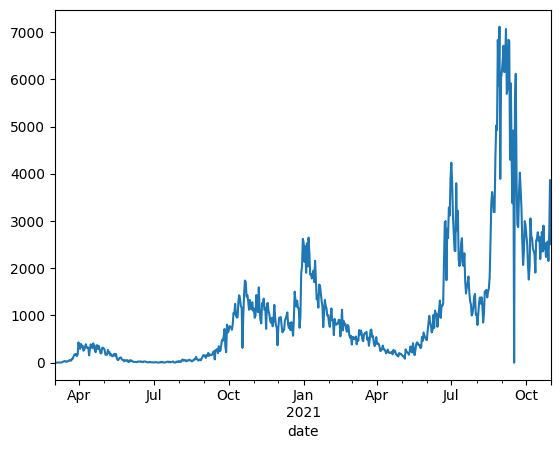

In [80]:
scotland_data.newCasesByPublishDate.plot();  # Adding a semicolon is preferred in Jupyter

We could have achieved the same result by using the following syntax too:

```python
scotland_data.newCasesByPublishDate.plot.line();
```

These plotting functions offer various [arguments](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) to adjust the appearance of your plots. These arguments are passed to the underlying Matplotlib methods, allowing for fine-tuning. You can also specify different types of plots; for instance, you could visualise the data as a box plot.

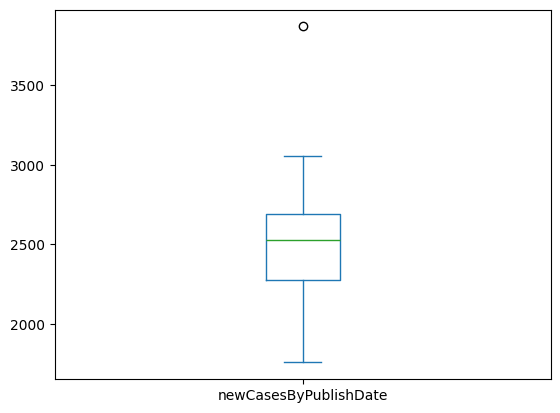

In [81]:
# Select a time window (1-month)
window = scotland_data['2021-09-30':'2021-10-30']

window.newCasesByPublishDate.plot.box();

Do you notice anything unusual?

<details>
<summary>Click here for hint</summary>
In the box plot, we see an outlier above the upper whisker, represented by a single point around 3500. This indicates that there is a data point with a significantly higher value than the rest of the distribution for <em>newCasesByPublishDate</em>. Outliers like this can impact analysis, so it's often a good idea to investigate these values further to understand their context or consider handling them differently, depending on your analysis goals.
</details>

<br>

Let's plot the raw data along with the 10-day rolling average.

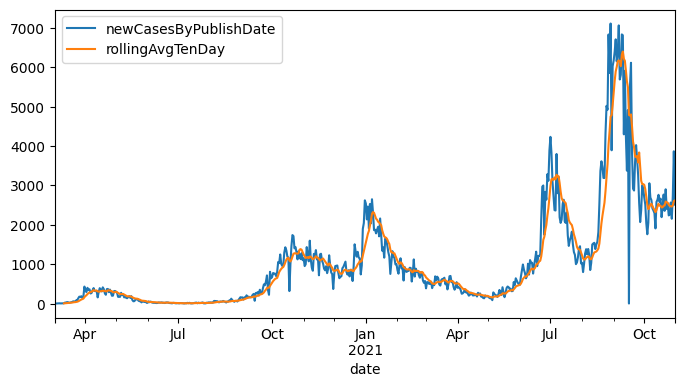

In [82]:
scotland_data.newCasesByPublishDate.plot(figsize=(8, 4));  # Also specify the size
scotland_data.rollingAvgTenDay.plot();
plt.legend();  # We can also add a legend

We can also save figures using `.savefig()`. Check the `data` folder.

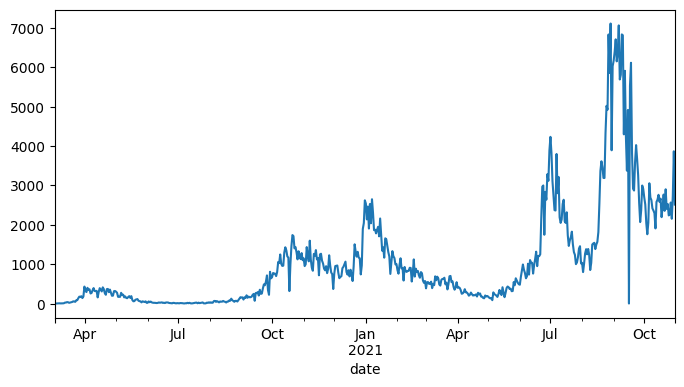

In [83]:
figure = scotland_data.newCasesByPublishDate.plot(figsize=(8, 4)).get_figure()
figure.savefig('Scotland.png');

## Discussion

Cleaning, analysing, manipulating and visualising data is an essential skill for a data scientist. In fact, 80% of a data scientist's job is cleaning data for analysis.

Feel free to add more code cells and experiment with the concepts you have learnt.

You can use this notebook as reference if you need to refresh your knowledge on any of the concepts explored.

If you want to learn more there are some extra external resources linked at the beginning of this notebook. You can click [here](#Contents) to go back to the top.